In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Assignment

Task-1: [1 marks]

1.1. Load the [combined cycle power plant dataset](https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant) from UCI. [0.5 marks]

1.2. Split the dataset into training, validation and test sets (70%-15%-15%). [0.5 marks]

In [ ]:
from ucimlrepo import fetch_ucirepo
dataset = fetch_ucirepo(id = 294)

In [ ]:

target = pd.DataFrame(data = dataset.data.targets)
df = pd.DataFrame(data = dataset.data.features)


In [ ]:
target.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [ ]:
df.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(df, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Task-2: [2 marks]

2.1. Perform feature scaling such that the features lie in the same range of values. [1 marks]

2.2. Show the correlation between the features of the training set. [1 marks]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train, columns = df.columns)
X_val = scaler.transform(X_val)
X_val = pd.DataFrame(data = X_val, columns = df.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(data = X_test, columns = df.columns)

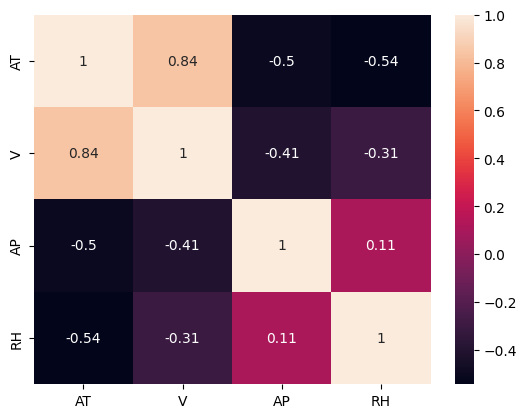

In [ ]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Task-3: [5 marks]

3.1. Fit an SVM with linear kernel on the training set using sklearn’s SVR. [2 marks]

3.2. Tune the hyperparameters C and ε on the validation set using grid search (Take range of values of C and ε as provided below). [3 marks]

C = 0.01, 0.1, 1, 10, 100; ε = 0.001, 0.01, 0.1, 0.5, 1.0

In [ ]:
from sklearn.svm import SVR

h_params = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 0.5, 1.0]}
best_c = -1
best_e = -1
best_score =-1
for c in h_params['C']:
  for e in h_params['epsilon']:
    smr = SVR(kernel = 'linear', C = c, epsilon = e)
    smr.fit(X_train.values, y_train.values)
    print(f"C: {c}, epsilon: {e}, score: {smr.score(X_val.values, y_val.values)}")
    if(smr.score(X_test.values, y_test.values) > best_score):
      best_score = smr.score(X_test.values, y_test.values)
      best_c = c
      best_e = e
print(f"Best C: {best_c}, Best epsilon: {best_e}, Best score: {best_score}")






/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.01, epsilon: 0.001, score: 0.5040848575501582


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.01, epsilon: 0.01, score: 0.504001767485587


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.01, epsilon: 0.1, score: 0.5047178770871089


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.01, epsilon: 0.5, score: 0.5046547019499343


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.01, epsilon: 1.0, score: 0.5047905360034585


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.001, score: 0.9084767325494851


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.01, score: 0.9085365547058971


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.1, score: 0.9086689199940788


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.5, score: 0.9084960432979517


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 1.0, score: 0.9083264347611091


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.001, score: 0.9289783461115594


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.01, score: 0.928971161423141


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.1, score: 0.9289184509980877


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.5, score: 0.9289835411087084


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 1.0, score: 0.9290142646316006


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.001, score: 0.9288511471667346


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.01, score: 0.9288603599667378


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.1, score: 0.9289201017547263


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.5, score: 0.9288201093165371


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 1.0, score: 0.9289204016554284


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.001, score: 0.9287404864449315


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.01, score: 0.9287179891476234


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.1, score: 0.9288116025918075


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.5, score: 0.9287317646662954


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 1.0, score: 0.9288308284229351
Best C: 1, Best epsilon: 1.0, Best score: 0.9247186686270411


Task-4: [3 marks]

4.1. Evaluate the linear SVM regressor using the best value of C and ε you obtained. Report the performance in terms of MSE and R^2 score. [1 marks]

4.2. Show a scatter plot of the predictions of the linear SVR model vs. the ground truth target values. [2 marks]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

best_linear = SVR(kernel = 'linear', C = best_c, epsilon = best_e)
best_linear.fit(X_train.values, y_train.values)
print(f"MSE: {best_linear.score(X_test.values, y_test.values)}")
print(f"R^2 score: {best_linear.score(X_test.values, y_test.values)}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.9247186686270411
R^2 score: 0.9247186686270411


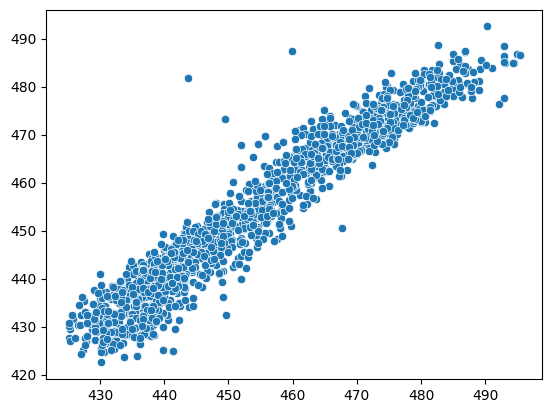

In [ ]:
preds = best_linear.predict(X_test.values)
sns.scatterplot(x = y_test.values.flatten(), y = preds.flatten())
plt.show()

Task-5: [6 marks]

5.1. Fit an SVM with RBF kernel on the training set using sklearn’s SVR. [2 marks]

5.2. Tune the hyperparameters C, γ and ε on the validation set using grid search (Take range of values of C, γ and ε as provided below). [4 marks]

C = 0.1, 1, 10, 100, 1000; γ = 0.001, 0.01, 0.1, 1, 10; ε = 0.01, 0.1, 0.5, 1.0

In [ ]:
h_params_rbf = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5, 1.0]}
best_c = -1
best_e = -1
best_gamma = -1
best_score =-1

for c in h_params_rbf['C']:
  for e in h_params_rbf['epsilon']:
    for g in h_params_rbf['gamma']:
      smr = SVR(kernel = 'rbf', C = c, epsilon = e, gamma = g)
      smr.fit(X_train.values, y_train.values)
      print(f"C: {c}, epsilon: {e}, gamma: {g}, score: {smr.score(X_val.values, y_val.values)}")
      if(smr.score(X_test.values, y_test.values) > best_score):
        best_score = smr.score(X_test.values, y_test.values)
        best_c = c
        best_e = e
        best_gamma = g
print(f"Best C: {best_c}, Best epsilon: {best_e}, Best gamma: {best_gamma}, Best score: {best_score}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.01, gamma: 0.001, score: -0.019021185043138322


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.01, gamma: 0.01, score: 0.0983496446966009


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.01, gamma: 0.1, score: 0.7284283215912604


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.01, gamma: 1, score: 0.9251826650939616


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.01, gamma: 10, score: 0.9187669445574338


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.1, gamma: 0.001, score: -0.018335564088409306


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.1, gamma: 0.01, score: 0.09866806704994746


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.1, gamma: 0.1, score: 0.7285009170715682


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.1, gamma: 1, score: 0.9251942351271414


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.1, gamma: 10, score: 0.9188599914169775


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.5, gamma: 0.001, score: -0.019580457306159094


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.5, gamma: 0.01, score: 0.09831176681167897


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.5, gamma: 0.1, score: 0.7273116847419623


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.5, gamma: 1, score: 0.925125550346021


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 0.5, gamma: 10, score: 0.9187408420816028


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 1.0, gamma: 0.001, score: -0.018420556924818143


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 1.0, gamma: 0.01, score: 0.09882975127444593


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 1.0, gamma: 0.1, score: 0.7269715999164363


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 1.0, gamma: 1, score: 0.9247321101917803


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.1, epsilon: 1.0, gamma: 10, score: 0.9186753037135617


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.01, gamma: 0.001, score: 0.09885259089277687


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.01, gamma: 0.01, score: 0.7375730829713916


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.01, gamma: 0.1, score: 0.9252893654238346


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.01, gamma: 1, score: 0.9416117926020054


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.01, gamma: 10, score: 0.9456026567673124


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.1, gamma: 0.001, score: 0.09912389654244413


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.1, gamma: 0.01, score: 0.7379575173967503


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.1, gamma: 0.1, score: 0.9252340563394474


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.1, gamma: 1, score: 0.9416485599196746


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.1, gamma: 10, score: 0.9456047450269542


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.5, gamma: 0.001, score: 0.09880056528674153


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.5, gamma: 0.01, score: 0.7377517720870349


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.5, gamma: 0.1, score: 0.9251433908895436


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.5, gamma: 1, score: 0.9415602661917509


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 0.5, gamma: 10, score: 0.9457275309807502


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 1.0, gamma: 0.001, score: 0.0993321858994306


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 1.0, gamma: 0.01, score: 0.7373213791416956


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 1.0, gamma: 0.1, score: 0.9250604224900567


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 1.0, gamma: 1, score: 0.9415554034623513


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1, epsilon: 1.0, gamma: 10, score: 0.9458700898520627


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.01, gamma: 0.001, score: 0.7389034320376358


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.01, gamma: 0.01, score: 0.9219769400829684


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.01, gamma: 0.1, score: 0.9377492044936694


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.01, gamma: 1, score: 0.9434672129994441


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.01, gamma: 10, score: 0.9482970130502762


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.1, gamma: 0.001, score: 0.7387874301572752


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.1, gamma: 0.01, score: 0.9220605175684332


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.1, gamma: 0.1, score: 0.9377514167848551


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.1, gamma: 1, score: 0.9435116925220299


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.1, gamma: 10, score: 0.9483927590793434


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.5, gamma: 0.001, score: 0.7388842867621215


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.5, gamma: 0.01, score: 0.9218954240791617


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.5, gamma: 0.1, score: 0.9378315180699904


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.5, gamma: 1, score: 0.9434976843174387


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 0.5, gamma: 10, score: 0.9485654480700796


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 1.0, gamma: 0.001, score: 0.7381195897137607


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 1.0, gamma: 0.01, score: 0.9217624917874502


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 1.0, gamma: 0.1, score: 0.9378102813980842


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 1.0, gamma: 1, score: 0.94354528465655


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 10, epsilon: 1.0, gamma: 10, score: 0.9487688380613075


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.01, gamma: 0.001, score: 0.9214895036422455


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.01, gamma: 0.01, score: 0.9318834201274364


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.01, gamma: 0.1, score: 0.9408259600666652


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.01, gamma: 1, score: 0.9445818432448455


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.01, gamma: 10, score: 0.9493461171439399


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.1, gamma: 0.001, score: 0.9215625596837967


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.1, gamma: 0.01, score: 0.9318931938233231


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.1, gamma: 0.1, score: 0.9407925356929067


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.1, gamma: 1, score: 0.9446195665986856


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.1, gamma: 10, score: 0.9493278864569935


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.5, gamma: 0.001, score: 0.9213758406774989


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.5, gamma: 0.01, score: 0.9318883872540689


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.5, gamma: 0.1, score: 0.9407227731425996


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.5, gamma: 1, score: 0.9447830423723934


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 0.5, gamma: 10, score: 0.9494262734643182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 1.0, gamma: 0.001, score: 0.9213502768965962


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 1.0, gamma: 0.01, score: 0.9320343670587773


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 1.0, gamma: 0.1, score: 0.9406606299355762


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 1.0, gamma: 1, score: 0.9449084501164897


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 100, epsilon: 1.0, gamma: 10, score: 0.9498394752094591


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.01, gamma: 0.001, score: 0.9295803826988349


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.01, gamma: 0.01, score: 0.9369392501182168


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.01, gamma: 0.1, score: 0.9421013759960213


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.01, gamma: 1, score: 0.9450068189967078


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.01, gamma: 10, score: 0.9503236170807068


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.1, gamma: 0.001, score: 0.9295066404617082


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.1, gamma: 0.01, score: 0.9369596102915667


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.1, gamma: 0.1, score: 0.9420811337123163


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.1, gamma: 1, score: 0.9450202327608691


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.1, gamma: 10, score: 0.9503805109675804


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.5, gamma: 0.001, score: 0.9293824195607332


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.5, gamma: 0.01, score: 0.9369496198453167


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.5, gamma: 0.1, score: 0.9419986405854635


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.5, gamma: 1, score: 0.9453718620185081


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 0.5, gamma: 10, score: 0.9507608283131536


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 1.0, gamma: 0.001, score: 0.929565050758655


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 1.0, gamma: 0.01, score: 0.9370187846590475


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 1.0, gamma: 0.1, score: 0.9420588238207701


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 1.0, gamma: 1, score: 0.945436564455434


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 1000, epsilon: 1.0, gamma: 10, score: 0.9508816566659581
Best C: 1000, Best epsilon: 0.01, Best gamma: 10, Best score: 0.9432500455742936


Task-6: [3 marks]

6.1. Evaluate the RBF SVM regressor using the best value of C, γ and ε you obtained. Report the performance in terms of MSE and R^2 score. [1 marks]

6.2. Show a scatter plot of the predictions of the RBF SVR model vs. the ground truth target values. [2 marks]

In [ ]:
best_rbf = SVR(kernel = 'rbf', C = best_c, epsilon = best_e, gamma = best_gamma)
best_rbf.fit(X_train.values, y_train.values)
print(f"MSE: {best_rbf.score(X_test.values, y_test.values)}")
print(f"R^2 score: {best_rbf.score(X_test.values, y_test.values)}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.9432500455742936
R^2 score: 0.9432500455742936


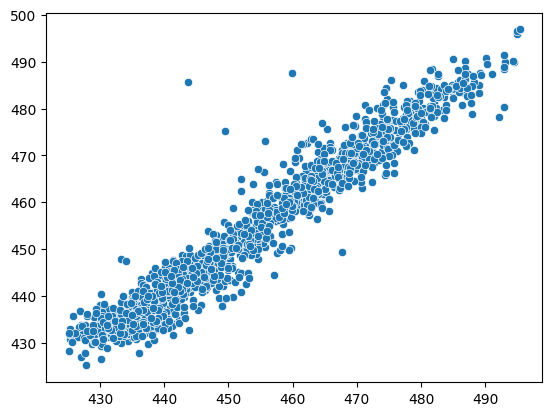

In [ ]:
sns.scatterplot(x = y_test.values.flatten(), y = best_rbf.predict(X_test.values).flatten())
plt.show()